In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the file
lead = pd.read_csv('/content/drive/MyDrive/Leads.csv')

In [3]:
#displaying all columns of the dataframe
pd.set_option("display.max_columns",None)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead.shape

(9240, 37)

## Data Cleaning

In [5]:
# List of columns having 'Select' as value

cols_with_select_value = [col for col in lead.columns if len(lead[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [6]:
leads = lead.replace('Select', "Other", inplace=True)

In [7]:
cols_with_select_value = [col for col in lead.columns if len(lead[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


In [8]:
#Looking for null values
round((lead.isnull().sum()/len(lead))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

**Dropping all the column which has more than 40% null values.**

In [9]:
remove=(lead.isnull().mean()*100).sort_values(ascending= False)[lead.isnull().mean()*100>40].index.tolist()
lead= lead.drop(columns= remove)

Checking the other columns with null values

In [10]:
round((lead.isnull().sum()/len(lead))*100,2).sort_values(ascending =False)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Prospect ID                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free cop

In [11]:
lead.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [12]:
lead["Lead Profile"].value_counts()

Other                          4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Converting th null values to other Leads

In [13]:
lead['Lead Profile'].fillna('Other Leads', inplace= True)

In [14]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Converting th null values to other

In [15]:
lead['What matters most to you in choosing a course'].fillna('Other', inplace= True)

In [16]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Converting th null values to other

In [17]:
lead['What is your current occupation'].fillna('Other', inplace =True)

In [18]:
lead['How did you hear about X Education'].value_counts()

Other                    5229
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

Converting th null values to other

In [19]:
lead['How did you hear about X Education'].fillna('Other', inplace =True)

In [20]:
lead['Specialization'].value_counts()

Other                                1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In Specialization null value can indicate whether a customer is student or he/she is not having any Specialization. So, these customers belong to other category.  

In [21]:
lead['Specialization'].fillna('Other', inplace= True)

In [22]:
round((lead.isnull().sum()/len(lead))*100,2).sort_values(ascending =False)

Tags                                             36.29
Country                                          26.63
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Prospect ID                                       0.00
X Education Forums                                0.00
Get updates on DM Content                         0.00
Lead Profile                                      0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Newspaper                                         0.00
Search    

### **Droping columns which is not useful in model building**

Dropping columns which have unique value

In [23]:
lead= lead.drop(['Prospect ID', 'Lead Number'], axis=1)

In [24]:
round((lead.isnull().sum()/len(lead))*100,2).sort_values(ascending =False)

Tags                                             36.29
Country                                          26.63
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Update me on Supply Chain Content                 0.00
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Lead Origin                                       0.00
Get updates on DM Content                         0.00
Newspaper                                         0.00
Lead Profile                                      0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Advertisement                             0.00
Magazine                                          0.00
X Educatio

In [25]:
lead = lead[~lead['Lead Source'].isnull()]

In [26]:
lead = lead[~lead['Last Activity'].isnull()]
lead = lead[~lead['Page Views Per Visit'].isnull()]
lead = lead[~lead['TotalVisits'].isnull()]

In [27]:
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

using replace function

In [28]:
lead['Lead Source'].replace(['Google','google','bing'],['Organic Search','Organic Search','Organic Search'],inplace=True)
lead['Lead Source'].replace(['youtubechannel','Facebook','youtubechannel'],['SocialMedia Traffic','SocialMedia Traffic','SocialMedia Traffic'],inplace=True)
lead['Lead Source'].replace(['Welingak Website','WeLearn','testone','NC_EDM'],['Referral Sites','Referral Sites','Referral Sites','Referral Sites'],inplace=True)
lead['Lead Source'].replace(['blog','Social Media','welearnblog_Home'],['SocialMedia Traffic','SocialMedia Traffic','SocialMedia Traffic'],inplace = True)
lead['Lead Source'].replace(['Live Chat','Olark Chat','Pay per Click Ads','Click2call','Press_Release'],['Paid Source','Paid Source','Paid Source','Paid Source','Paid Source'],inplace=True)


In [29]:
lead['Lead Source'].value_counts()

Organic Search         4033
Direct Traffic         2543
Paid Source            1762
Reference               443
Referral Sites          257
SocialMedia Traffic      36
Name: Lead Source, dtype: int64

In [30]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6370
Other                        2703
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
check = ['Tags','Country', 'City','Digital Advertisement','Update me on Supply Chain Content','Get updates on DM Content',
                  'I agree to pay the amount through cheque','X Education Forums', 'Newspaper','Search', 'Magazine'
                  ,'Newspaper Article','Through Recommendations','Receive More Updates About Our Courses'
                  ,'What matters most to you in choosing a course','How did you hear about X Education', 'Do Not Call']

In [32]:
def col(x,y):
  for column in y :
    print(x[column].value_counts(), '\n')

col(lead, check)

Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [33]:
lead = lead.drop(['Tags','Country', 'City','Digital Advertisement','Update me on Supply Chain Content','Get updates on DM Content',
                  'I agree to pay the amount through cheque','X Education Forums', 'Newspaper','Search', 'Magazine'
                  ,'Newspaper Article','Through Recommendations','Receive More Updates About Our Courses'
                  ,'What matters most to you in choosing a course','How did you hear about X Education', 'Do Not Call'], axis=1)

In [34]:
lead.shape

(9074, 13)

In [35]:
lead.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Lead Profile                              0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [36]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,API,Paid Source,No,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Other,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Other,Unemployed,Other,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Potential Lead,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Other,No,Modified
4,Landing Page Submission,Organic Search,No,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Other,No,Modified


##**Now data is clean from null values and unwanted columns**

**Renaming some columns**

In [37]:
lead = lead.rename({"What is your current occupation":"occupation", "A free copy of Mastering The Interview":"Free InterviewBooklet"},axis=1)

Looking for datatype

In [38]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9074 non-null   object 
 1   Lead Source                  9074 non-null   object 
 2   Do Not Email                 9074 non-null   object 
 3   Converted                    9074 non-null   int64  
 4   TotalVisits                  9074 non-null   float64
 5   Total Time Spent on Website  9074 non-null   int64  
 6   Page Views Per Visit         9074 non-null   float64
 7   Last Activity                9074 non-null   object 
 8   Specialization               9074 non-null   object 
 9   occupation                   9074 non-null   object 
 10  Lead Profile                 9074 non-null   object 
 11  Free InterviewBooklet        9074 non-null   object 
 12  Last Notable Activity        9074 non-null   object 
dtypes: float64(2), int

All the datatypes are correct.

#### Statistical analysis

In [39]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


After doing statistical analysis we can say that data can have some outliers.

##**Looking for outliers**

<Axes: xlabel='TotalVisits'>

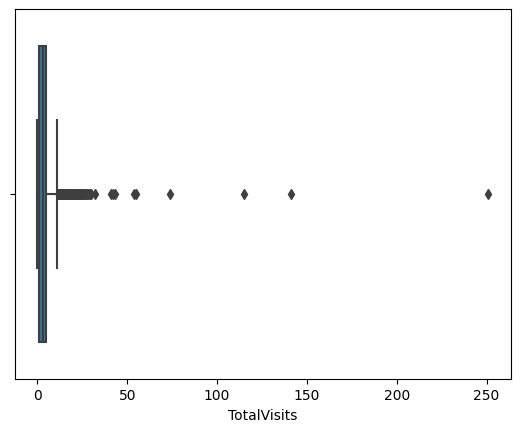

In [40]:
sns.boxplot(data= lead , x='TotalVisits')

In [41]:
lead[lead['TotalVisits']>40]

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,occupation,Lead Profile,Free InterviewBooklet,Last Notable Activity
1160,Landing Page Submission,Direct Traffic,No,0,43.0,57,3.91,Email Opened,Marketing Management,Unemployed,Other Leads,No,Email Opened
2190,Landing Page Submission,Direct Traffic,Yes,0,55.0,297,55.00,Page Visited on Website,IT Projects Management,Unemployed,Other,Yes,Modified
2322,Landing Page Submission,Direct Traffic,Yes,0,141.0,755,6.71,Page Visited on Website,Human Resource Management,Other,Other Leads,Yes,Page Visited on Website
5283,Landing Page Submission,Direct Traffic,Yes,0,74.0,1209,12.33,Page Visited on Website,Other,Unemployed,Other,No,Page Visited on Website
5530,Landing Page Submission,Direct Traffic,Yes,0,41.0,311,1.14,Page Visited on Website,Retail Management,Other,Other Leads,No,Page Visited on Website
5538,Landing Page Submission,Referral Sites,No,0,54.0,1280,4.50,SMS Sent,Other,Other,Other Leads,No,SMS Sent
5608,Landing Page Submission,Referral Sites,Yes,0,115.0,187,8.21,Page Visited on Website,Rural and Agribusiness,Unemployed,Other Leads,No,Page Visited on Website
6102,Landing Page Submission,Direct Traffic,No,1,251.0,49,1.48,Page Visited on Website,Supply Chain Management,Unemployed,Other,Yes,Page Visited on Website
8230,Landing Page Submission,Direct Traffic,Yes,0,42.0,1148,3.82,Page Visited on Website,Other,Unemployed,Other Leads,No,Modified


**Total visits column have some outliers**

<Axes: xlabel='Total Time Spent on Website'>

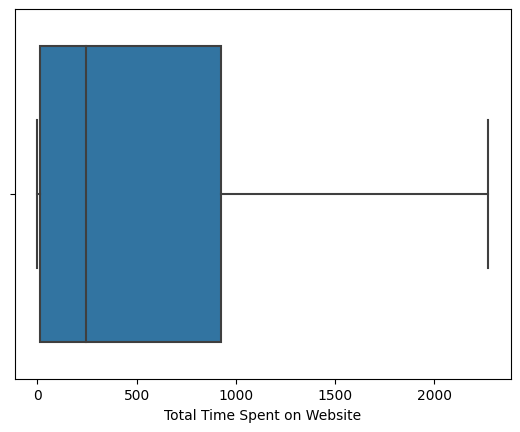

In [42]:
sns.boxplot(data=lead, x ='Total Time Spent on Website')

<Axes: xlabel='Page Views Per Visit'>

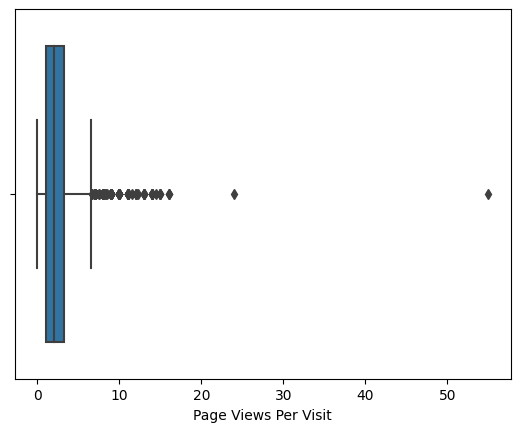

In [43]:
sns.boxplot(lead, x= 'Page Views Per Visit')

In [44]:
lead[lead['Page Views Per Visit']>20]

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,occupation,Lead Profile,Free InterviewBooklet,Last Notable Activity
2190,Landing Page Submission,Direct Traffic,Yes,0,55.0,297,55.0,Page Visited on Website,IT Projects Management,Unemployed,Other,Yes,Modified
6805,API,Organic Search,No,1,24.0,1527,24.0,Page Visited on Website,Other,Other,Other Leads,No,Modified


**page Views Per Visit have outliers**

Dropping the outliers

<Axes: xlabel='TotalVisits'>

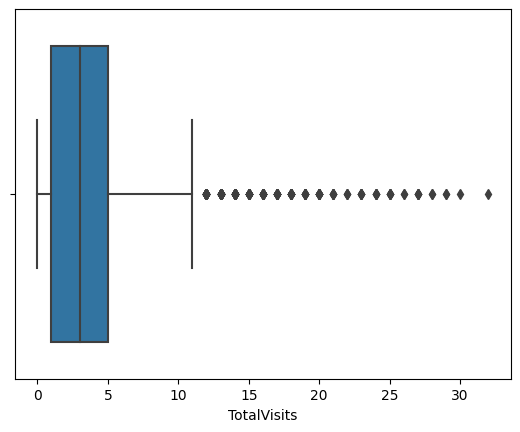

In [45]:
lead = lead[lead['TotalVisits']<40]
sns.boxplot(lead, x='TotalVisits')

In [46]:
lead = lead[lead['Page Views Per Visit']<20]

<Axes: xlabel='Page Views Per Visit'>

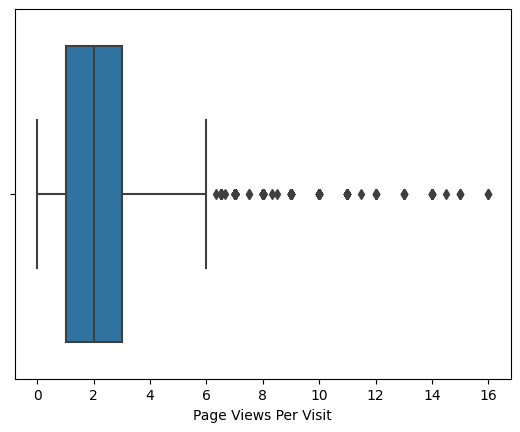

In [47]:
sns.boxplot(lead , x  = 'Page Views Per Visit')

In [48]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9064.000000,9064.000000,9064.000000,9064.000000
mean,0.378751,3.367167,482.667807,2.359405
std,0.485103,3.426633,545.224394,2.073430
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,921.250000,3.000000
max,1.000000,32.000000,2272.000000,16.000000


In [49]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,occupation,Lead Profile,Free InterviewBooklet,Last Notable Activity
0,API,Paid Source,No,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Other,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Other,Unemployed,Other,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Potential Lead,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Other,No,Modified
4,Landing Page Submission,Organic Search,No,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Other,No,Modified


In [50]:
lead['Last Activity'].value_counts()

Email Opened                    3431
SMS Sent                        2715
Olark Chat Conversation          972
Page Visited on Website          632
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

**Converting the entries of Last Activity to more meaningful data**

In [51]:
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed','Email Bounced','Email Marked Spam'],'Unable to connect')

In [52]:
lead['Last Activity'] = lead['Last Activity'].replace(['Olark Chat Conversation','Form Submitted on Website','Approached upfront','Visited Booth in Tradeshow','Resubscribed to emails','Had a Phone Conversation','Email Received'],'contacted')

In [53]:
lead['Last Activity'] = lead['Last Activity'].replace(['Email Link Clicked','View in browser link Clicked'],'Page Visited on Website')

In [54]:
lead['Last Activity'].value_counts()

Email Opened               3431
SMS Sent                   2715
contacted                  1122
Page Visited on Website     905
Unable to connect           463
Converted to Lead           428
Name: Last Activity, dtype: int64

In [55]:
lead['Last Notable Activity'].value_counts()

Modified                        3264
Email Opened                    2822
SMS Sent                        2151
Page Visited on Website          313
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

**Dropping the Last Notable Activity as it is the duplicate data of Last Activity**.

In [56]:
lead = lead.drop('Last Notable Activity', axis= 1)

In [57]:
lead['Lead Profile'].value_counts()

Other                          4052
Other Leads                    3177
Potential Lead                 1554
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [58]:
lead['Lead Profile']= lead['Lead Profile'].replace('Other','Other Leads')

In [59]:
lead['Specialization'].value_counts()

Other                                3278
Finance Management                    959
Human Resource Management             836
Marketing Management                  822
Operations Management                 499
Business Administration               399
IT Projects Management                365
Supply Chain Management               345
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                      99
Rural and Agribusiness                 72
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [60]:
lead['Specialization']= lead['Specialization'].replace(['E-Business','E-COMMERCE','International Business','Rural and Agribusiness'],'Business')
lead['Specialization']= lead['Specialization'].replace(['Travel and Tourism','Services Excellence'],'Hospitality Management')

# EDA

**Univariate Analysis**

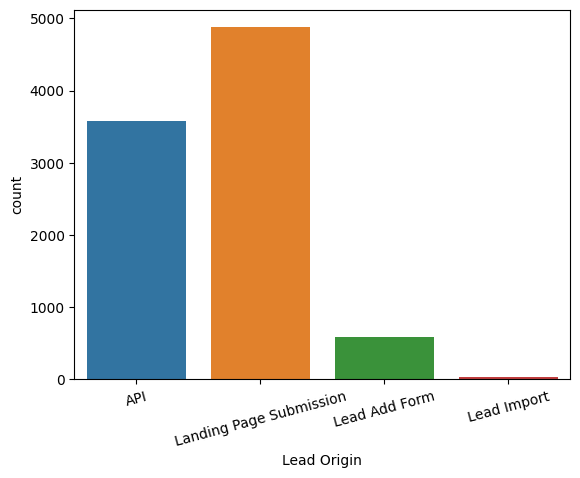

In [61]:
# Lead Origin
sns.countplot(data=lead, x='Lead Origin')
plt.xticks(rotation=15)
plt.show()

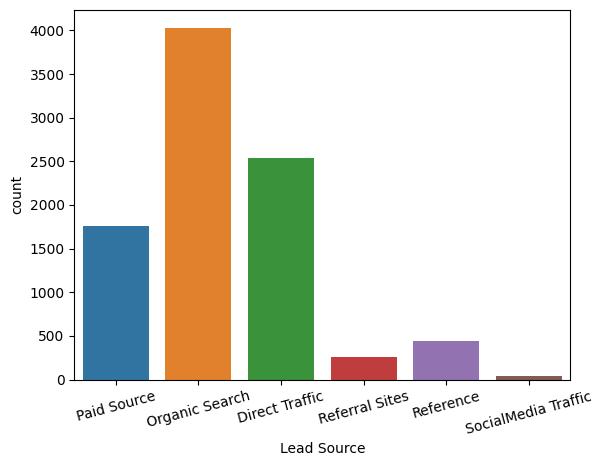

In [62]:
sns.countplot(data = lead, x="Lead Source")
plt.xticks(rotation=15)
plt.show()

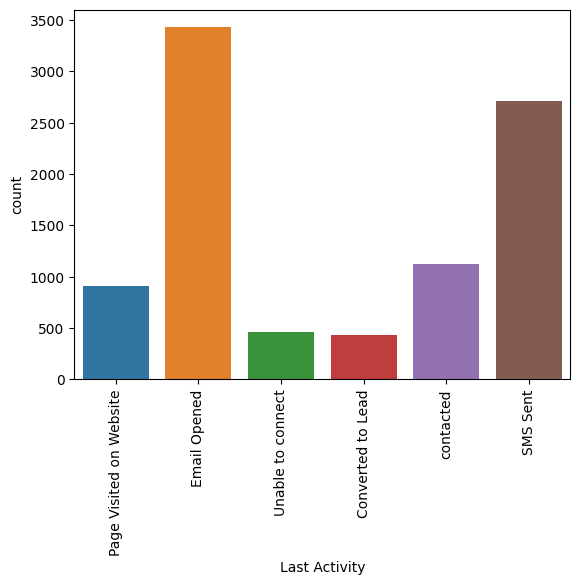

In [63]:
sns.countplot(data = lead, x="Last Activity")
plt.xticks(rotation=90)
plt.show()

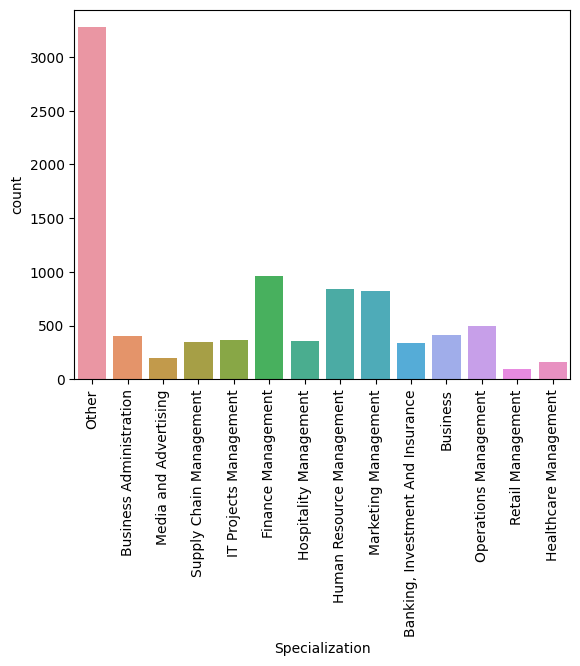

In [64]:
sns.countplot(data = lead, x="Specialization")
plt.xticks(rotation=90)
plt.show()

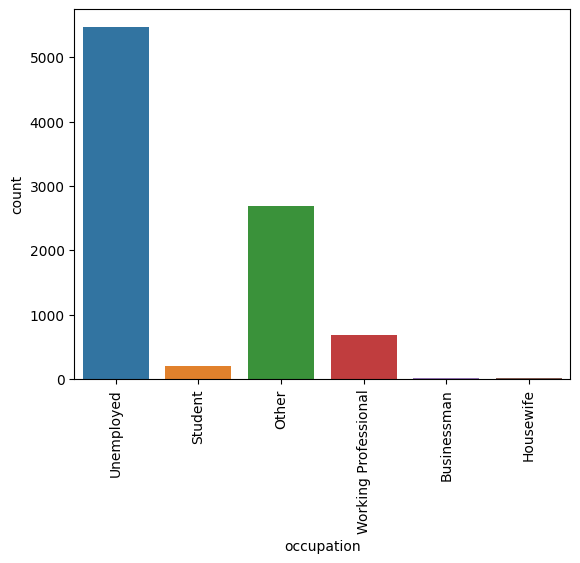

In [65]:
sns.countplot(data = lead, x="occupation")
plt.xticks(rotation=90)
plt.show()

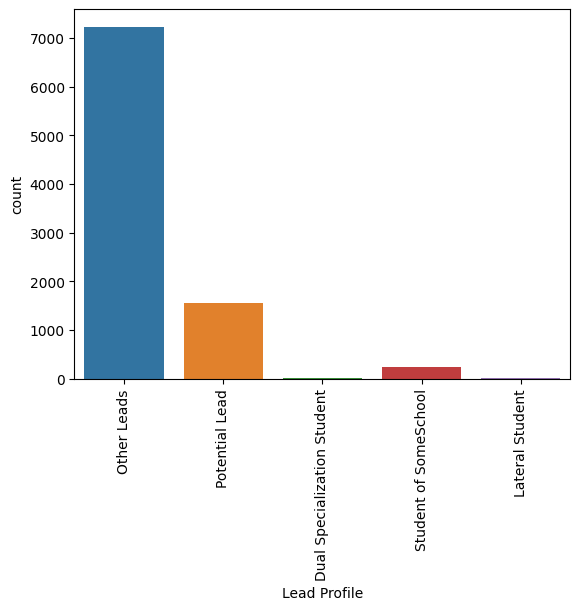

In [66]:
sns.countplot(data = lead, x="Lead Profile")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Do Not Email', ylabel='count'>

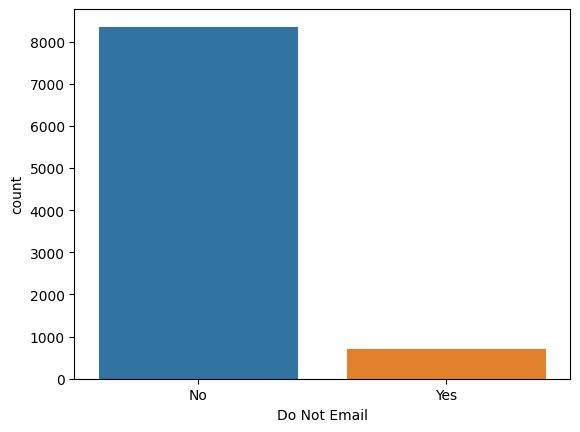

In [67]:
sns.countplot(lead, x='Do Not Email')

<Axes: xlabel='Free InterviewBooklet', ylabel='count'>

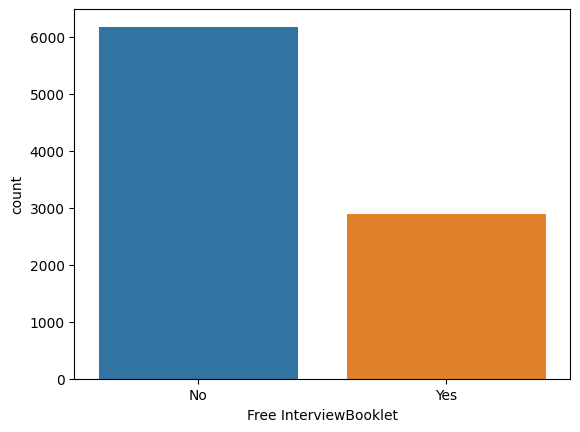

In [68]:
sns.countplot(lead, x='Free InterviewBooklet')

<Axes: xlabel='Converted', ylabel='count'>

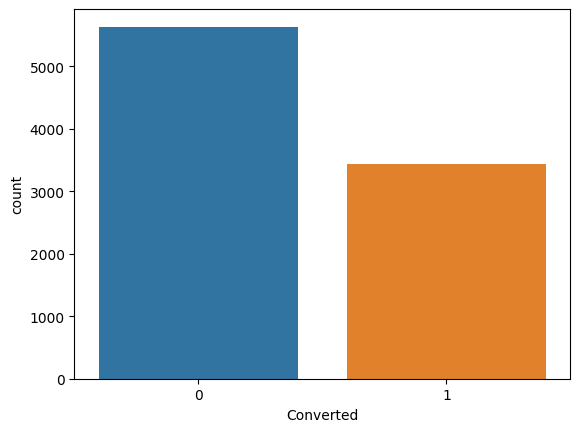

In [69]:
sns.countplot(lead, x='Converted')


In [70]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'occupation', 'Lead Profile',
       'Free InterviewBooklet'],
      dtype='object')

**Bivariate analysis**

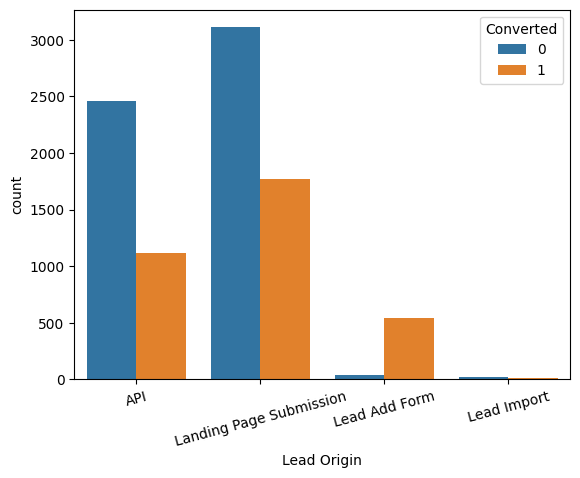

In [71]:
sns.countplot(lead, x= 'Lead Origin', hue='Converted')
plt.xticks(rotation=15)
plt.show()

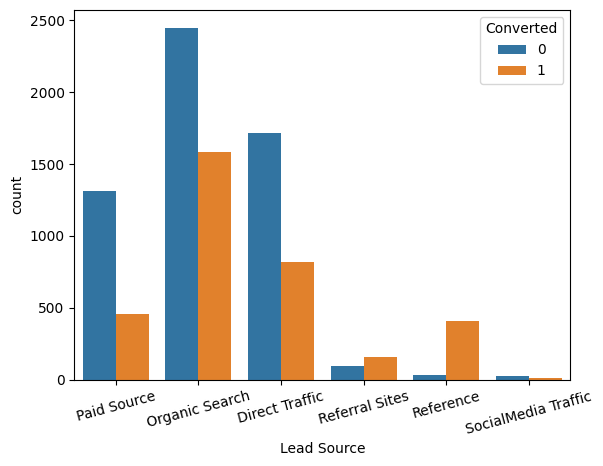

In [72]:
sns.countplot(lead, x= 'Lead Source', hue='Converted')
plt.xticks(rotation=15)
plt.show()

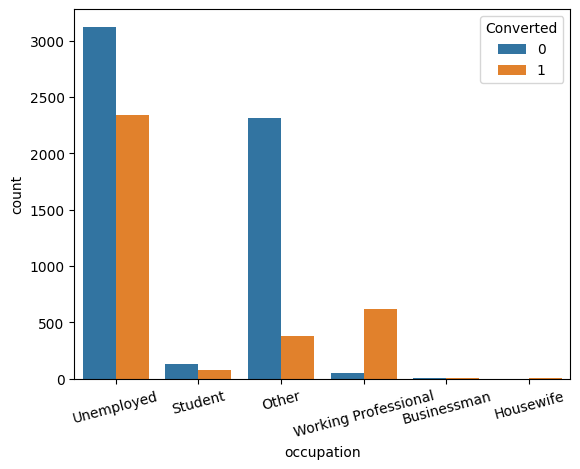

In [73]:

sns.countplot(lead, x= 'occupation', hue='Converted')
plt.xticks(rotation=15)
plt.show()

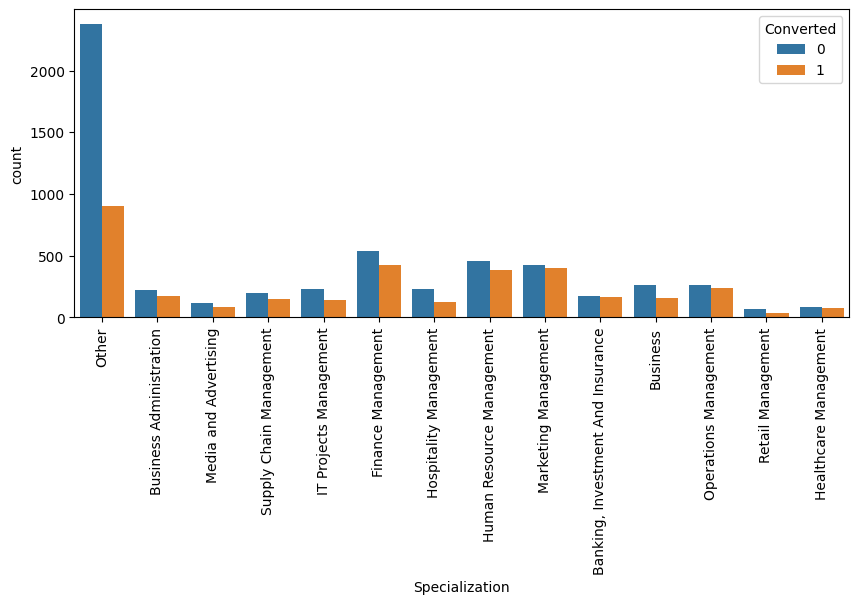

In [74]:
plt.figure(figsize= [10,4])
sns.countplot(lead, x= 'Specialization', hue='Converted')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Converted', ylabel='TotalVisits'>

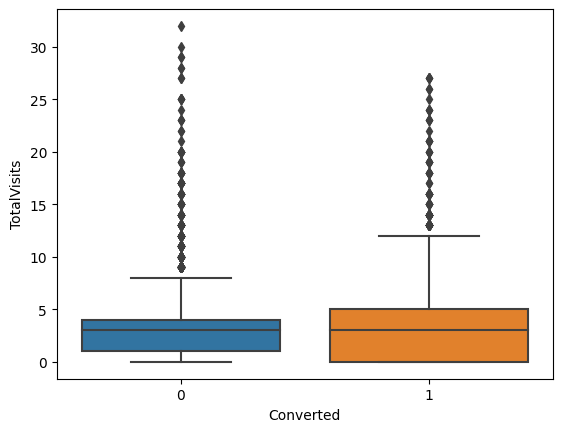

In [75]:
sns.boxplot(lead, y='TotalVisits', x='Converted')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

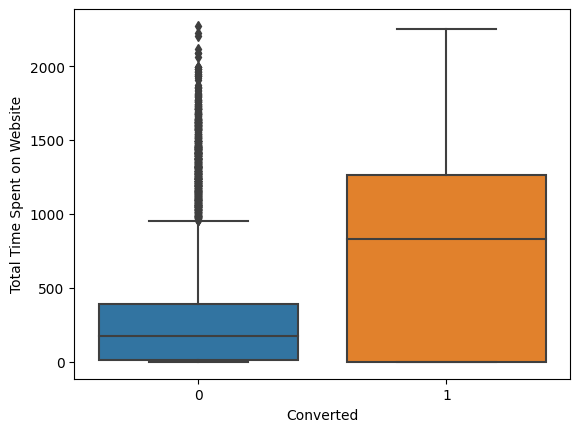

In [76]:
sns.boxplot(lead, y='Total Time Spent on Website', x='Converted')

## Data Preparation

In [77]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'occupation', 'Lead Profile',
       'Free InterviewBooklet'],
      dtype='object')

In [78]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,occupation,Lead Profile,Free InterviewBooklet
0,API,Paid Source,No,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Other Leads,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Other,Unemployed,Other Leads,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Potential Lead,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unable to connect,Media and Advertising,Unemployed,Other Leads,No
4,Landing Page Submission,Organic Search,No,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Other Leads,No


In [79]:
var = ['Do Not Email','Free InterviewBooklet']
def binaryconvert(x):
  return x.map({'Yes':1,'No':0})

lead[var]= lead[var].apply(binaryconvert)


**Creating dummies for categorical data**

In [80]:
dummy = pd.get_dummies(lead[['Lead Source','Lead Origin','Last Activity', 'Specialization', 'occupation', 'Lead Profile']], drop_first = True)

lead = pd.concat([lead,dummy], axis=1)

In [81]:
lead = lead.drop(['Lead Source','Lead Origin','Last Activity', 'Specialization', 'occupation', 'Lead Profile'], axis=1)

## Train-Test Split

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X= lead.drop('Converted', axis=1)
y=lead['Converted']

In [84]:
X_train,X_test, y_train,y_test= train_test_split(X,y , test_size=0.3, random_state=100)

## Feature Selection

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler= StandardScaler()

In [87]:
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] =scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [88]:
rate=(sum(lead['Converted'])/len(lead['Converted'].index))*100
rate

37.875110326566634

We have almost 38% convertion rate.

### Model buliding

In [89]:
import statsmodels.api as sm

In [90]:
m1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2429.4
Date:                Mon, 01 Jan 2024   Deviance:                       4858.9
Time:                        04:00:26   Pearson chi2:                 6.34e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4286
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       22.3082   2.69e+04      0.001      0.999   -5.27e+04    5.28e+04
Do Not Email                                -1.4251      0.209     -6.810      0.000      -1.835      -1.015
TotalVisits                                  0.2781      0.049      5.631      0.000       0.181       0.375
Total Time Spent on Website                  1.0741      0.042     25.313      0.000       0.991       1.157
Page Views Per Visit                        -0.2124      0.057     -3.758      0.000      -0.323      -0.102
Free InterviewBooklet                       -0.1950      0.107     -1.830      0.067      -0.404       0.014
Lead Source_Organic Search                   0.1841      0.109      1.691      0.091      -0.029       0.397
Lead Source_Paid Source                      1.3595      0.167      8.145      0.000       1.032       1.687
Lead Source_Reference                       -1.9626      0.727     -2.701      0.007      -3.387      -0.538
Lead Source_Referral Sites                   0.1378      0.351      0.392      0.695      -0.551       0.827
Lead Source_SocialMedia Traffic             -0.2549      1.276     -0.200      0.842      -2.755       2.245
Lead Origin_Landing Page Submission         -0.4991      0.144     -3.461      0.001      -0.782      -0.216
Lead Origin_Lead Add Form                    4.8755      0.687      7.099      0.000       3.529       6.222
Lead Origin_Lead Import                      0.9382      1.367      0.687      0.492      -1.740       3.617
Last Activity_Email Opened                   1.0494      0.217      4.846      0.000       0.625       1.474
Last Activity_Page Visited on Website        0.4308      0.247      1.743      0.081      -0.054       0.915
Last Activity_SMS Sent                       2.2719      0.218     10.410      0.000       1.844       2.700
Last Activity_Unable to connect              1.0503      0.312      3.363      0.001       0.438       1.663
Last Activity_contacted                     -0.0667      0.250     -0.267      0.790      -0.558       0.424
Specialization_Business                      0.0767      0.250      0.307      0.758      -0.412       0.566
Specialization_Business Administration      -0.0827      0.257     -0.322      0.747      -0.586       0.420
Specialization_Finance Management            0.0771      0.220      0.351      0.726      -0.354       0.508
Specialization_Healthcare Management        -0.0041      0.338     -0.012      0.990      -0.667       0.659
Specialization_Hospitality Management       -0.4173      0.268     -1.560      0.119      -0.942       0.107
Specialization_Human Resource Management    -0.0645      0.225     -0.286      0.775      -0.506       0.377
Specialization_IT Projects Mana

## Feature Selection Using RFE

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [92]:
X_train.shape

(6344, 40)

In [93]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Free InterviewBooklet', False, 4),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Paid Source', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_SocialMedia Traffic', False, 11),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unable to connect', True, 1),
 ('Last Activity_contacted', False, 7),
 ('Specialization_Business', False, 14),
 ('Specialization_Business Administration', False, 19),
 ('Specialization_Finance Management', False, 15),
 ('Specialization_Healthcare Management', False, 18),
 ('Specialization_Hospitality Management', True, 1),
 ('Speci

In [95]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Paid Source', 'Lead Source_Reference',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Last Activity_Unable to connect',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'Specialization_Retail Management', 'occupation_Housewife',
       'occupation_Other', 'occupation_Unemployed',
       'occupation_Working Professional', 'Lead Profile_Lateral Student',
       'Lead Profile_Other Leads', 'Lead Profile_Student of SomeSchool'],
      dtype='object')

In [96]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Free InterviewBooklet',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_SocialMedia Traffic', 'Lead Origin_Lead Import',
       'Last Activity_contacted', 'Specialization_Business',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management', 'occupation_Student',
       'Lead Profile_Potential Lead'],
      dtype='object')

In [97]:
X_train_sm = sm.add_constant(X_train)
m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2429.4
Date:                Mon, 01 Jan 2024   Deviance:                       4858.9
Time:                        04:00:28   Pearson chi2:                 6.34e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4286
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       22.3082   2.69e+04      0.001      0.999   -5.27e+04    5.28e+04
Do Not Email                                -1.4251      0.209     -6.810      0.000      -1.835      -1.015
TotalVisits                                  0.2781      0.049      5.631      0.000       0.181       0.375
Total Time Spent on Website                  1.0741      0.042     25.313      0.000       0.991       1.157
Page Views Per Visit                        -0.2124      0.057     -3.758      0.000      -0.323      -0.102
Free InterviewBooklet                       -0.1950      0.107     -1.830      0.067      -0.404       0.014
Lead Source_Organic Search                   0.1841      0.109      1.691      0.091      -0.029       0.397
Lead Source_Paid Source                      1.3595      0.167      8.145      0.000       1.032       1.687
Lead Source_Reference                       -1.9626      0.727     -2.701      0.007      -3.387      -0.538
Lead Source_Referral Sites                   0.1378      0.351      0.392      0.695      -0.551       0.827
Lead Source_SocialMedia Traffic             -0.2549      1.276     -0.200      0.842      -2.755       2.245
Lead Origin_Landing Page Submission         -0.4991      0.144     -3.461      0.001      -0.782      -0.216
Lead Origin_Lead Add Form                    4.8755      0.687      7.099      0.000       3.529       6.222
Lead Origin_Lead Import                      0.9382      1.367      0.687      0.492      -1.740       3.617
Last Activity_Email Opened                   1.0494      0.217      4.846      0.000       0.625       1.474
Last Activity_Page Visited on Website        0.4308      0.247      1.743      0.081      -0.054       0.915
Last Activity_SMS Sent                       2.2719      0.218     10.410      0.000       1.844       2.700
Last Activity_Unable to connect              1.0503      0.312      3.363      0.001       0.438       1.663
Last Activity_contacted                     -0.0667      0.250     -0.267      0.790      -0.558       0.424
Specialization_Business                      0.0767      0.250      0.307      0.758      -0.412       0.566
Specialization_Business Administration      -0.0827      0.257     -0.322      0.747      -0.586       0.420
Specialization_Finance Management            0.0771      0.220      0.351      0.726      -0.354       0.508
Specialization_Healthcare Management        -0.0041      0.338     -0.012      0.990      -0.667       0.659
Specialization_Hospitality Management       -0.4173      0.268     -1.560      0.119      -0.942       0.107
Specialization_Human Resource Management    -0.0645      0.225     -0.286      0.775      -0.506       0.377
Specialization_IT Projects Mana

In [98]:
col = col.drop('occupation_Housewife')

In [99]:
X_train_sm = sm.add_constant(X_train[col])
m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2461.3
Date:                Mon, 01 Jan 2024   Deviance:                       4922.5
Time:                        04:00:29   Pearson chi2:                 6.48e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4228
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3792      0.293      1.295      0.195      -0.195       0.953
Do Not Email                             -1.4434      0.206     -7.006      0.000      -1.847      -1.040
Total Time Spent on Website               1.0731      0.042     25.669      0.000       0.991       1.155
Lead Source_Paid Source                   1.1328      0.123      9.179      0.000       0.891       1.375
Lead Source_Reference                    -2.1147      0.637     -3.317      0.001      -3.364      -0.865
Lead Origin_Landing Page Submission      -0.7012      0.134     -5.248      0.000      -0.963      -0.439
Lead Origin_Lead Add Form                 4.7959      0.601      7.978      0.000       3.618       5.974
Last Activity_Email Opened                1.1113      0.125      8.917      0.000       0.867       1.356
Last Activity_Page Visited on Website     0.6296      0.166      3.784      0.000       0.303       0.956
Last Activity_SMS Sent                    2.3045      0.129     17.819      0.000       2.051       2.558
Last Activity_Unable to connect           1.1039      0.258      4.272      0.000       0.597       1.610
Specialization_Hospitality Management    -0.4459      0.191     -2.339      0.019      -0.820      -0.072
Specialization_Other                     -0.5407      0.130     -4.150      0.000      -0.796      -0.285
Specialization_Retail Management         -0.5042      0.349     -1.445      0.148      -1.188       0.180
occupation_Other                         -1.6583      0.251     -6.598      0.000      -2.151      -1.166
occupation_Unemployed                    -0.6392      0.241     -2.653      0.008      -1.112      -0.167
occupation_Working Professional           1.6333      0.301      5.424      0.000       1.043       2.224
Lead Profile_Lateral Student             20.2827   1.14e+04      0.002      0.999   -2.24e+04    2.24e+04
Lead Profile_Other Leads                 -1.4456      0.105    -13.780      0.000      -1.651      -1.240
Lead Profile_Student of SomeSchool       -3.8010      0.468     -8.124      0.000      -4.718      -2.884
=========================================================================================================
"""

In [100]:
col= col.drop('Lead Profile_Lateral Student')

In [101]:
X_train_sm = sm.add_constant(X_train[col])
m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2462.9
Date:                Mon, 01 Jan 2024   Deviance:                       4925.7
Time:                        04:00:29   Pearson chi2:                 6.49e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4225
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3881      0.293      1.325      0.185      -0.186       0.962
Do Not Email                             -1.4451      0.206     -7.009      0.000      -1.849      -1.041
Total Time Spent on Website               1.0742      0.042     25.699      0.000       0.992       1.156
Lead Source_Paid Source                   1.1337      0.123      9.184      0.000       0.892       1.376
Lead Source_Reference                    -2.1012      0.637     -3.297      0.001      -3.350      -0.852
Lead Origin_Landing Page Submission      -0.7033      0.134     -5.266      0.000      -0.965      -0.442
Lead Origin_Lead Add Form                 4.8013      0.601      7.988      0.000       3.623       5.979
Last Activity_Email Opened                1.1117      0.125      8.928      0.000       0.868       1.356
Last Activity_Page Visited on Website     0.6294      0.166      3.785      0.000       0.303       0.955
Last Activity_SMS Sent                    2.3033      0.129     17.819      0.000       2.050       2.557
Last Activity_Unable to connect           1.1022      0.259      4.263      0.000       0.595       1.609
Specialization_Hospitality Management    -0.4438      0.190     -2.332      0.020      -0.817      -0.071
Specialization_Other                     -0.5440      0.130     -4.176      0.000      -0.799      -0.289
Specialization_Retail Management         -0.5084      0.349     -1.456      0.145      -1.193       0.176
occupation_Other                         -1.6540      0.252     -6.576      0.000      -2.147      -1.161
occupation_Unemployed                    -0.6354      0.241     -2.634      0.008      -1.108      -0.163
occupation_Working Professional           1.6366      0.301      5.431      0.000       1.046       2.227
Lead Profile_Other Leads                 -1.4563      0.105    -13.902      0.000      -1.662      -1.251
Lead Profile_Student of SomeSchool       -3.8111      0.468     -8.141      0.000      -4.729      -2.894
=========================================================================================================
"""

In [102]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,occupation_Unemployed,9.28
16,Lead Profile_Other Leads,7.25
4,Lead Origin_Landing Page Submission,6.60
13,occupation_Other,5.96
11,Specialization_Other,4.54
5,Lead Origin_Lead Add Form,4.48
3,Lead Source_Reference,4.31
6,Last Activity_Email Opened,3.22
8,Last Activity_SMS Sent,2.98
2,Lead Source_Paid Source,2.16


**There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Specialization_Retail Management' has the highest VIF. So let's start by dropping that.**

In [104]:
col = col.drop('Specialization_Retail Management')

In [105]:
X_train_sm = sm.add_constant(X_train[col])
m5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2463.9
Date:                Mon, 01 Jan 2024   Deviance:                       4927.9
Time:                        04:00:29   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4223
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3782      0.293      1.290      0.197      -0.196       0.953
Do Not Email                             -1.4487      0.206     -7.039      0.000      -1.852      -1.045
Total Time Spent on Website               1.0724      0.042     25.694      0.000       0.991       1.154
Lead Source_Paid Source                   1.1304      0.123      9.161      0.000       0.889       1.372
Lead Source_Reference                    -2.0994      0.637     -3.295      0.001      -3.348      -0.850
Lead Origin_Landing Page Submission      -0.7080      0.134     -5.301      0.000      -0.970      -0.446
Lead Origin_Lead Add Form                 4.7980      0.601      7.983      0.000       3.620       5.976
Last Activity_Email Opened                1.1130      0.125      8.939      0.000       0.869       1.357
Last Activity_Page Visited on Website     0.6292      0.166      3.784      0.000       0.303       0.955
Last Activity_SMS Sent                    2.3041      0.129     17.821      0.000       2.051       2.558
Last Activity_Unable to connect           1.1004      0.259      4.256      0.000       0.594       1.607
Specialization_Hospitality Management    -0.4336      0.190     -2.281      0.023      -0.806      -0.061
Specialization_Other                     -0.5391      0.130     -4.139      0.000      -0.794      -0.284
occupation_Other                         -1.6539      0.252     -6.562      0.000      -2.148      -1.160
occupation_Unemployed                    -0.6345      0.242     -2.625      0.009      -1.108      -0.161
occupation_Working Professional           1.6326      0.302      5.414      0.000       1.042       2.224
Lead Profile_Other Leads                 -1.4505      0.105    -13.864      0.000      -1.656      -1.245
Lead Profile_Student of SomeSchool       -3.8475      0.470     -8.191      0.000      -4.768      -2.927
=========================================================================================================
"""

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,occupation_Unemployed,9.27
15,Lead Profile_Other Leads,7.25
4,Lead Origin_Landing Page Submission,6.59
12,occupation_Other,5.95
11,Specialization_Other,4.53
5,Lead Origin_Lead Add Form,4.48
3,Lead Source_Reference,4.31
6,Last Activity_Email Opened,3.22
8,Last Activity_SMS Sent,2.98
2,Lead Source_Paid Source,2.16


### Dropping occupation_Unemployed Leads as VIF is high

In [107]:
col = col.drop('occupation_Unemployed')

In [108]:
X_train_sm = sm.add_constant(X_train[col])
m6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2467.4
Date:                Mon, 01 Jan 2024   Deviance:                       4934.9
Time:                        04:00:30   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4217
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2347      0.176     -1.335      0.182      -0.579       0.110
Do Not Email                             -1.4452      0.206     -7.026      0.000      -1.848      -1.042
Total Time Spent on Website               1.0732      0.042     25.725      0.000       0.991       1.155
Lead Source_Paid Source                   1.1373      0.123      9.223      0.000       0.896       1.379
Lead Source_Reference                    -2.0576      0.637     -3.230      0.001      -3.306      -0.809
Lead Origin_Landing Page Submission      -0.6983      0.134     -5.225      0.000      -0.960      -0.436
Lead Origin_Lead Add Form                 4.7922      0.601      7.975      0.000       3.614       5.970
Last Activity_Email Opened                1.1107      0.124      8.933      0.000       0.867       1.354
Last Activity_Page Visited on Website     0.6295      0.166      3.791      0.000       0.304       0.955
Last Activity_SMS Sent                    2.2930      0.129     17.769      0.000       2.040       2.546
Last Activity_Unable to connect           1.0963      0.258      4.246      0.000       0.590       1.602
Specialization_Hospitality Management    -0.4294      0.190     -2.263      0.024      -0.801      -0.058
Specialization_Other                     -0.5371      0.131     -4.114      0.000      -0.793      -0.281
occupation_Other                         -1.0360      0.090    -11.486      0.000      -1.213      -0.859
occupation_Working Professional           2.2433      0.192     11.689      0.000       1.867       2.619
Lead Profile_Other Leads                 -1.4586      0.105    -13.947      0.000      -1.664      -1.254
Lead Profile_Student of SomeSchool       -3.6875      0.470     -7.852      0.000      -4.608      -2.767
=========================================================================================================
"""

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Lead Profile_Other Leads,6.40
4,Lead Origin_Landing Page Submission,4.99
5,Lead Origin_Lead Add Form,4.47
3,Lead Source_Reference,4.25
11,Specialization_Other,3.78
6,Last Activity_Email Opened,2.67
8,Last Activity_SMS Sent,2.55
2,Lead Source_Paid Source,2.01
9,Last Activity_Unable to connect,1.95
0,Do Not Email,1.82


**Dropping Specialization_Hospitality Management as it has high p value**

In [110]:
col=col.drop('Specialization_Hospitality Management')

In [111]:
X_train_sm = sm.add_constant(X_train[col])
m7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2470.0
Date:                Mon, 01 Jan 2024   Deviance:                       4940.1
Time:                        04:00:30   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4212
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2586      0.175     -1.474      0.140      -0.602       0.085
Do Not Email                             -1.4678      0.206     -7.140      0.000      -1.871      -1.065
Total Time Spent on Website               1.0719      0.042     25.722      0.000       0.990       1.154
Lead Source_Paid Source                   1.1374      0.123      9.227      0.000       0.896       1.379
Lead Source_Reference                    -2.0643      0.637     -3.241      0.001      -3.313      -0.816
Lead Origin_Landing Page Submission      -0.7027      0.134     -5.257      0.000      -0.965      -0.441
Lead Origin_Lead Add Form                 4.7932      0.601      7.976      0.000       3.615       5.971
Last Activity_Email Opened                1.1131      0.124      8.963      0.000       0.870       1.356
Last Activity_Page Visited on Website     0.6256      0.166      3.770      0.000       0.300       0.951
Last Activity_SMS Sent                    2.2917      0.129     17.782      0.000       2.039       2.544
Last Activity_Unable to connect           1.0786      0.258      4.174      0.000       0.572       1.585
Specialization_Other                     -0.5171      0.130     -3.968      0.000      -0.772      -0.262
occupation_Other                         -1.0363      0.090    -11.493      0.000      -1.213      -0.860
occupation_Working Professional           2.2336      0.191     11.675      0.000       1.859       2.609
Lead Profile_Other Leads                 -1.4535      0.104    -13.924      0.000      -1.658      -1.249
Lead Profile_Student of SomeSchool       -3.6702      0.469     -7.827      0.000      -4.589      -2.751
=========================================================================================================
"""

In [112]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
13,Lead Profile_Other Leads,6.40
4,Lead Origin_Landing Page Submission,4.96
5,Lead Origin_Lead Add Form,4.47
3,Lead Source_Reference,4.25
10,Specialization_Other,3.77
6,Last Activity_Email Opened,2.66
8,Last Activity_SMS Sent,2.55
2,Lead Source_Paid Source,2.01
9,Last Activity_Unable to connect,1.95
0,Do Not Email,1.82


In [113]:
col = col.drop('Lead Profile_Other Leads')

In [114]:
X_train_sm = sm.add_constant(X_train[col])
m8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.3
Date:                Mon, 01 Jan 2024   Deviance:                       5146.6
Time:                        04:00:31   Pearson chi2:                 6.90e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1608      0.157     -7.379      0.000      -1.469      -0.852
Do Not Email                             -1.4691      0.201     -7.322      0.000      -1.862      -1.076
Total Time Spent on Website               1.0850      0.041     26.598      0.000       1.005       1.165
Lead Source_Paid Source                   1.1646      0.122      9.573      0.000       0.926       1.403
Lead Source_Reference                    -1.7492      0.635     -2.754      0.006      -2.994      -0.504
Lead Origin_Landing Page Submission      -0.9036      0.128     -7.084      0.000      -1.154      -0.654
Lead Origin_Lead Add Form                 4.7423      0.601      7.897      0.000       3.565       5.919
Last Activity_Email Opened                1.1390      0.122      9.363      0.000       0.901       1.377
Last Activity_Page Visited on Website     0.5896      0.162      3.640      0.000       0.272       0.907
Last Activity_SMS Sent                    2.2121      0.126     17.533      0.000       1.965       2.459
Last Activity_Unable to connect           1.0676      0.251      4.251      0.000       0.575       1.560
Specialization_Other                     -0.8863      0.124     -7.166      0.000      -1.129      -0.644
occupation_Other                         -1.3053      0.088    -14.878      0.000      -1.477      -1.133
occupation_Working Professional           2.3568      0.188     12.527      0.000       1.988       2.726
Lead Profile_Student of SomeSchool       -2.5780      0.473     -5.445      0.000      -3.506      -1.650
=========================================================================================================
"""

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,4.46
3,Lead Source_Reference,4.24
4,Lead Origin_Landing Page Submission,3.57
10,Specialization_Other,2.69
6,Last Activity_Email Opened,2.54
8,Last Activity_SMS Sent,2.43
2,Lead Source_Paid Source,1.99
9,Last Activity_Unable to connect,1.93
0,Do Not Email,1.82
11,occupation_Other,1.65


In [116]:
col = col.drop('Lead Source_Reference')

In [117]:
X_train_sm = sm.add_constant(X_train[col])
m9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.7
Date:                Mon, 01 Jan 2024   Deviance:                       5157.4
Time:                        04:00:32   Pearson chi2:                 6.98e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4010
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2019      0.157     -7.651      0.000      -1.510      -0.894
Do Not Email                             -1.4493      0.199     -7.296      0.000      -1.839      -1.060
Total Time Spent on Website               1.0860      0.041     26.625      0.000       1.006       1.166
Lead Source_Paid Source                   1.1619      0.121      9.569      0.000       0.924       1.400
Lead Origin_Landing Page Submission      -0.8633      0.127     -6.797      0.000      -1.112      -0.614
Lead Origin_Lead Add Form                 3.3969      0.224     15.171      0.000       2.958       3.836
Last Activity_Email Opened                1.1377      0.122      9.359      0.000       0.899       1.376
Last Activity_Page Visited on Website     0.5855      0.162      3.614      0.000       0.268       0.903
Last Activity_SMS Sent                    2.2155      0.126     17.577      0.000       1.968       2.462
Last Activity_Unable to connect           1.0500      0.251      4.183      0.000       0.558       1.542
Specialization_Other                     -0.8306      0.123     -6.759      0.000      -1.071      -0.590
occupation_Other                         -1.3100      0.088    -14.933      0.000      -1.482      -1.138
occupation_Working Professional           2.3513      0.188     12.490      0.000       1.982       2.720
Lead Profile_Student of SomeSchool       -2.5844      0.476     -5.431      0.000      -3.517      -1.652
=========================================================================================================
"""

In [118]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.54
9,Specialization_Other,2.62
5,Last Activity_Email Opened,2.53
7,Last Activity_SMS Sent,2.42
2,Lead Source_Paid Source,1.98
8,Last Activity_Unable to connect,1.93
0,Do Not Email,1.82
10,occupation_Other,1.64
6,Last Activity_Page Visited on Website,1.43
4,Lead Origin_Lead Add Form,1.39


In [119]:
y_train_pred = res.predict(X_train_sm)

In [120]:
y_train_pred = y_train_pred.values.reshape(-1)

In [121]:
y_train_pred_final = pd.DataFrame({'convert':y_train.values, 'convert_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,convert,convert_Prob,CustID
0,0,0.051121,2179
1,0,0.263246,3504
2,0,0.547381,5038
3,0,0.364666,3460
4,1,0.030576,7421


In [122]:
y_train_pred_final['predicted'] = y_train_pred_final.convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,convert,convert_Prob,CustID,predicted
0,0,0.051121,2179,0
1,0,0.263246,3504,0
2,0,0.547381,5038,1
3,0,0.364666,3460,0
4,1,0.030576,7421,0


In [123]:
from sklearn import metrics

## Metrics

In [124]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.convert, y_train_pred_final.predicted )
print(confusion)

[[3515  435]
 [ 705 1689]]


In [125]:
#the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.convert, y_train_pred_final.predicted))

0.8203026481715007


In [126]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [127]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.7055137844611529

In [128]:
# calculate specificity
TN / float(TN+FP)

0.889873417721519

In [129]:
# Calculate false postive rate - predicting converted when customer does not converted
print(FP/ float(TN+FP))

0.11012658227848102


In [130]:
# positive predictive value
print (TP / float(TP+FP))

0.7951977401129944


In [131]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8329383886255924


## Plotting the ROC Curve

In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.convert, y_train_pred_final.convert_Prob, drop_intermediate = False )

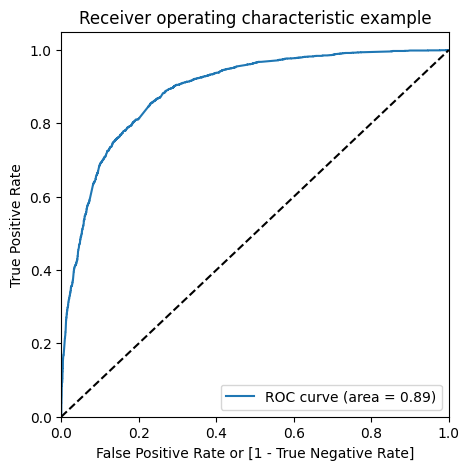

In [134]:
draw_roc(y_train_pred_final.convert, y_train_pred_final.convert_Prob)

## Finding Optimal Cutoff Point

In [136]:
# create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,convert,convert_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.051121,2179,0,1,0,0,0,0,0,0,0,0,0
1,0,0.263246,3504,0,1,1,1,0,0,0,0,0,0,0
2,0,0.547381,5038,1,1,1,1,1,1,1,0,0,0,0
3,0,0.364666,3460,0,1,1,1,1,0,0,0,0,0,0
4,1,0.030576,7421,0,1,0,0,0,0,0,0,0,0,0


In [138]:
#calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377364  1.000000  0.000000
0.1   0.1  0.624212  0.977026  0.410380
0.2   0.2  0.756778  0.920217  0.657722
0.3   0.3  0.795397  0.867586  0.751646
0.4   0.4  0.816835  0.769841  0.845316
0.5   0.5  0.820303  0.705514  0.889873
0.6   0.6  0.799811  0.590226  0.926835
0.7   0.7  0.781999  0.513367  0.944810
0.8   0.8  0.755675  0.410610  0.964810
0.9   0.9  0.719262  0.279031  0.986076


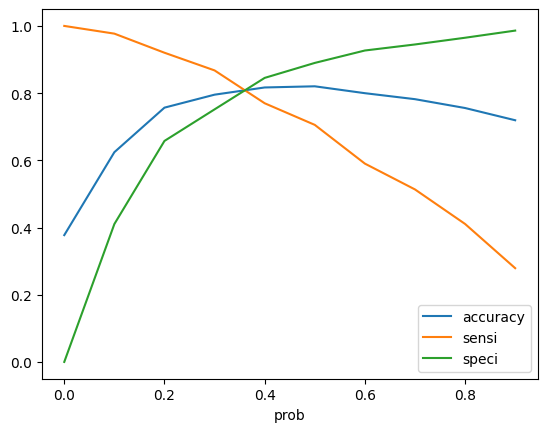

In [139]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [140]:
y_train_pred_final['final_predicted'] = y_train_pred_final.convert_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,convert,convert_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.051121,2179,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.263246,3504,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.547381,5038,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.364666,3460,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.030576,7421,0,1,0,0,0,0,0,0,0,0,0,0


In [141]:
# the overall accuracy.
metrics.accuracy_score(y_train_pred_final.convert, y_train_pred_final.final_predicted)

0.8117906683480454

In [142]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.convert, y_train_pred_final.final_predicted )
confusion2

array([[3254,  696],
       [ 498, 1896]])

In [143]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.7919799498746867

In [145]:
# calculate specificity
TN / float(TN+FP)

0.8237974683544304

In [146]:
# Calculate false postive rate - predicting convert when customer does not converted
print(FP/ float(TN+FP))

0.17620253164556962


In [147]:
# Positive predictive value
print (TP / float(TP+FP))

0.7314814814814815


In [148]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8672707889125799


## Precision and Recall

In [149]:
from sklearn.metrics import precision_score, recall_score

In [150]:
precision_score(y_train_pred_final.convert, y_train_pred_final.predicted)

0.7951977401129944

In [151]:
recall_score(y_train_pred_final.convert, y_train_pred_final.predicted)

0.7055137844611529

### Precision and recall tradeoff

In [152]:
from sklearn.metrics import precision_recall_curve

In [153]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.convert, y_train_pred_final.convert_Prob)

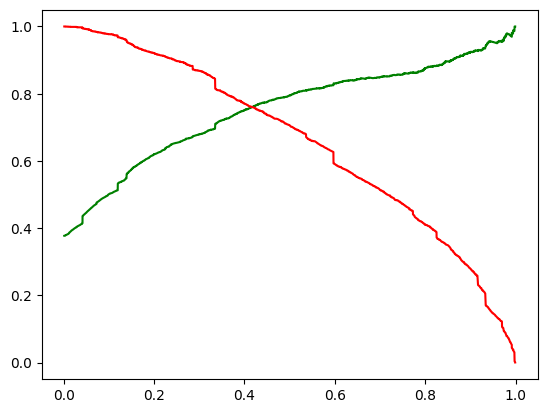

In [154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [155]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['convert_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,convert,convert_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.051121,2179,0,1,0,0,0,0,0,0,0,0,0,0,5
1,0,0.263246,3504,0,1,1,1,0,0,0,0,0,0,0,0,26
2,0,0.547381,5038,1,1,1,1,1,1,1,0,0,0,0,1,55
3,0,0.364666,3460,0,1,1,1,1,0,0,0,0,0,0,0,36
4,1,0.030576,7421,0,1,0,0,0,0,0,0,0,0,0,0,3
